In [1]:
import networkx as nx


### 207. Course Schedule

这样速度太慢了


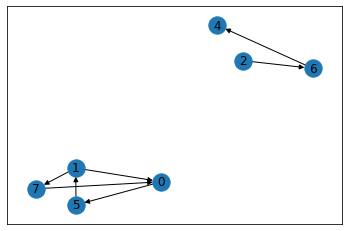

In [36]:
g = nx.gnm_random_graph(6, 10, directed=True)
while not nx.is_directed_acyclic_graph(g):
    g = nx.gnm_random_graph(6, 10, directed=True)


g = nx.DiGraph([[1,0],[2,6],[1,7],[5,1],[6,4],[7,0],[0,5]])
nx.draw_networkx(g)

In [12]:
[i for i in nx.topological_sort(g)]

[2, 5, 1, 4, 3, 0]

In [43]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:

        def isCyclic(u):
            nonlocal g, n, stack
            visited[u] = True
            stack[u] = True
            for v in g[u]:
                if not visited[v]:
                    if isCyclic(v):
                        return True
                elif stack[v]:
                    return True
            stack[u] = False
            return False

        n = numCourses
        g = [[] for _ in range(n)]
        for a, b in prerequisites:
            g[a].append(b)

        for u in range(n):
            visited = [False] * n
            stack = [False] * n
            if isCyclic(u):
                return False
        return True

In [44]:
Solution().canFinish(8, [[1,0],[2,6],[1,7],[5,1],[6,4],[7,0],[0,5]])

True

In [45]:
"""
第二种解法，每次都拿走一个source

运行时间只能战胜5%的人，太慢了
"""
from collections import deque
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        n = numCourses
        g = [[] for _ in range(n)]
        indegree = [0] * n
        for a, b in prerequisites:
            g[a].append(b)
            indegree[b] += 1
        sources = deque([u for u in range(n) if not indegree[u]])
        for _ in range(n):
            if not sources:
                return False
            u = sources.popleft()
            for v in g[u]:
                indegree[v] -= 1
                if not indegree[v]:
                    sources.append(v)
        return True

In [46]:
"""
临街矩阵太花时间，改成邻接表会快很多
"""
class Solution:
    def canFinish(self, numCourses: int, prerequisites) -> bool:
        n = numCourses
        g = [[] for _ in range(n)]
        in_degree = [0] * n
        removed = [0] * n
        for i, j in prerequisites:
            g[i].append(j)
            in_degree[j] += 1
        for _ in range(n):
            sources = [i for i in range(n) if in_degree[i] == 0 and not removed[i]]
            if not sources:
                return False
            u = sources[0]
            removed[u] = True
            for v in g[u]:
                in_degree[v] -= 1
        return True

In [65]:
from queue import PriorityQueue

q = PriorityQueue()

In [66]:
q.put((1 ,2))
q.put((0, 3))

In [64]:
while q.qsize():
    print(q.get())

In [68]:
a = {1,2,3}

In [69]:
a.pop()

1

In [70]:
a.pop()

2

In [71]:
"""
这种最快，哈哈
"""
class Solution:
    def canFinish(self, numCourses: int, prerequisites) -> bool:
        n = numCourses
        g = [[] for _ in range(n)]
        in_degree = [0] * n
        removed = [0] * n
        for i, j in prerequisites:
            g[i].append(j)
            in_degree[j] += 1
        sources = {i for i in range(n) if in_degree[i] == 0}
        for _ in range(n):
            if not sources: return False
            u = sources.pop()
            removed[u] = True
            for v in g[u]:
                in_degree[v] -= 1
                if in_degree[v] == 0 and not removed[v]:
                    sources.add(v)
        return True

{3}